In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('housePrice.csv')
df.dropna(inplace=True)
print(df.head())
print(df.info())

  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
Area          3456 non-null object
Room          3456 non-null int64
Parking       3456 non-null bool
Warehouse     3456 non-null bool
Elevator      3456 non-null bool
Address       3456 non-null object
Price         3456 non-null float64
Price(USD)    3456 non-null float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172

Text(0.5, 1.0, 'Distribution of prices')

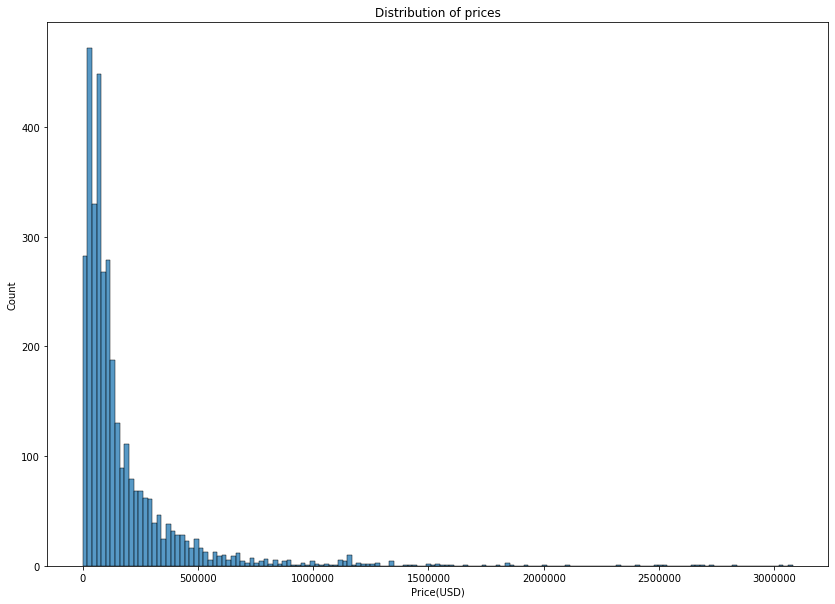

In [3]:
fig_dim = (14,10)
fig, ax = plt.subplots(figsize=fig_dim)
sns.histplot(data=df, x='Price(USD)',ax=ax)
plt.title('Distribution of prices')

In [4]:
print('Mean price: ($)',np.round(np.mean(df['Price(USD)']),decimals=2)) 
print('Median price: ($)',np.median(df['Price(USD)']))
v_expensive = 0
for price in df['Price(USD)']:
    if price > 1000000:
        v_expensive += 1
print(v_expensive)
print(v_expensive/len(df['Price(USD)']))

Mean price: ($) 179331.9
Median price: ($) 96666.67
76
0.02199074074074074


In [5]:
# changing the True/False answers to 1s and 0s, changing Area type from String to numeric and assigning a numeric
# type to the address variable
df["Area"]=df["Area"].str.replace(',','')
df['Parking'] = df['Parking'].apply(lambda x: 1 if x==True else 0)
df['Warehouse'] = df['Warehouse'].apply(lambda x: 1 if x==True else 0)
df['Elevator'] = df['Elevator'].apply(lambda x: 1 if x==True else 0)
df['Area'] = pd.to_numeric(df['Area'])
df1 = df["Address"].value_counts().to_dict()
df["Address"] = df["Address"].map(df1)

   Area  Room  Parking  Warehouse  Elevator  Address         Price  Price(USD)
0    63     1        1          1         1      130  1.850000e+09    61666.67
1    60     1        1          1         1      130  1.850000e+09    61666.67
2    79     2        1          1         1      146  5.500000e+08    18333.33
3    95     2        1          1         1       69  9.025000e+08    30083.33
4   123     2        1          1         1       59  7.000000e+09   233333.33
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
Area          3456 non-null int64
Room          3456 non-null int64
Parking       3456 non-null int64
Warehouse     3456 non-null int64
Elevator      3456 non-null int64
Address       3456 non-null int64
Price         3456 non-null float64
Price(USD)    3456 non-null float64
dtypes: float64(2), int64(6)
memory usage: 243.0 KB
None


Text(0.5, 1.0, 'Area vs Price')

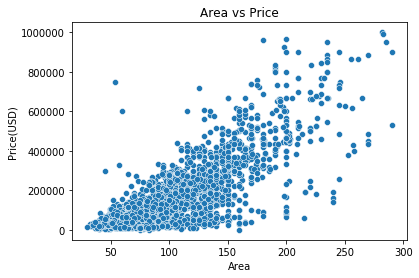

In [6]:
print(df.head())
print(df.info())
df_a = df[df['Area'] < 300]
df_b = df_a[df_a['Price(USD)'] <= 1000000]
sns.scatterplot(data=df_b, x='Area', y='Price(USD)')
plt.title('Area vs Price')


Text(0.5, 1.0, 'Room vs Price')

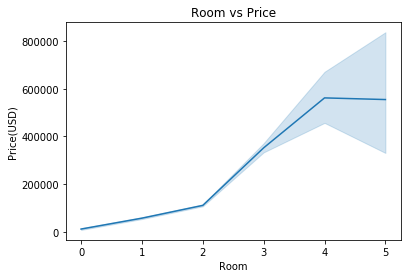

In [7]:
sns.lineplot(data=df_a, x='Room', y='Price(USD)')

plt.title('Room vs Price')

Text(0.5, 1.0, 'Area vs Price')

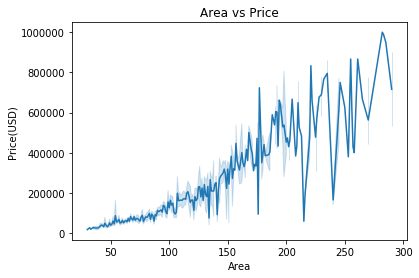

In [8]:
sns.lineplot(data=df_b, x='Area', y='Price(USD)')
plt.title('Area vs Price')

Text(0.5, 1.0, 'Address vs Price')

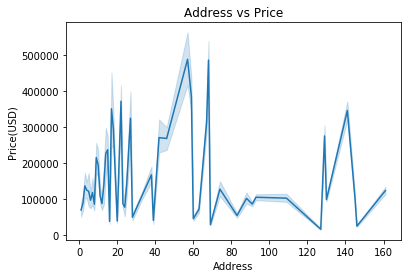

In [9]:
sns.lineplot(data=df_b, x='Address', y='Price(USD)')
plt.title('Address vs Price')

In [11]:
# Creating the data and labels as two seperate arrays and they randomly splitting them into test and train datasets.
ml_data = df_b[['Area','Room','Parking','Warehouse','Elevator','Address']]
ml_labels = df_b['Price(USD)']

ml_data_no_address = df_b[['Area','Room','Parking','Warehouse','Elevator']]


x_train, x_test, y_train, y_test = train_test_split(ml_data, ml_labels)
xna_train, xna_test, yna_train, yna_test = train_test_split(ml_data_no_address, ml_labels)

model = LinearRegression()
model.fit(x_train,y_train)

print('Model with address')

y_predict= model.predict(x_test)

print('Accuracy:',str(np.round(model.score(x_test,y_test),3)*100) +'%')

print('Coefficients:',model.coef_)

print('Model without address')

model_no_address = LinearRegression()
model_no_address.fit(xna_train, yna_train)

yna_predict = model_no_address.predict(xna_test)

print('Accuracy:',str(np.round(model_no_address.score(xna_test,yna_test),3)*100) +'%')

print('Coefficients:',model_no_address.coef_)



Model with address
Accuracy: 61.61299999999999%
Coefficients: [  3274.44636763 -29991.17193091  10494.72484676  23164.49615771
  11734.98506506     37.52997495]
Model without address
Accuracy: 63.443000000000005%
Coefficients: [  3265.99530488 -31715.96244167  13125.76973369  18219.69814008
  13100.34792372]


Text(0.5, 1.0, 'accuracy over time')

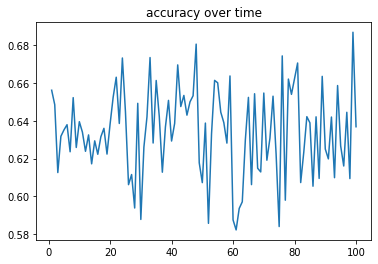

In [16]:
#
scores = []

for e in range(100):
    xs_train, xs_test, ys_train, ys_test = train_test_split(ml_data, ml_labels)
    model.fit(xs_train, ys_train)
    ys_predict = model.predict(xs_test)
    scores.append(model.score(xs_test,ys_test))
    
sns.lineplot(x=range(1,101), y=scores)
plt.title('accuracy over time')

Text(0.5, 1.0, 'Coef barplot with address')

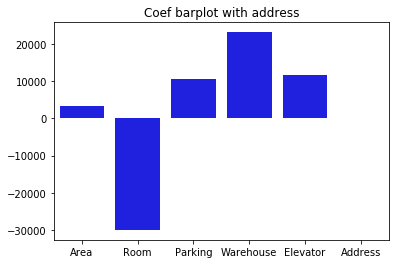

In [12]:
labels=['Area','Room', 'Parking','Warehouse','Elevator','Address']
sns.barplot(x=labels,y=model.coef_, color='b')
plt.title('Coef barplot with address')

Text(0.5, 1.0, 'Coef barplot without address')

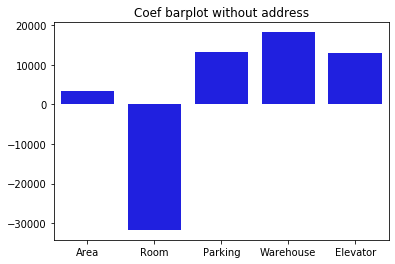

In [13]:
labels=['Area','Room', 'Parking','Warehouse','Elevator']
sns.barplot(x=labels,y=model_no_address.coef_, color='b')
plt.title('Coef barplot without address')

/Users/janbieniek/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


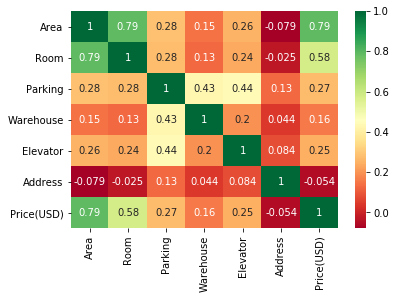

In [14]:

df_b.drop("Price", axis = 1, inplace=True)
sns.heatmap(df_b.corr(), annot=True,cmap='RdYlGn')